In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
from IPython.display import HTML 
HTML('''<script>code_show=true;function code_toggle()
{if (code_show){$('div.input').hide();} 
else{$('div.input').show();}code_show = !code_show}$( document ).ready(code_toggle);
</script><em>The raw code in this jupyter notebook is hidden by default for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</,!a></em>.''')

In [2]:
# general modules
import numpy as np
import sys
sys.path.append("/workdata/pygdsm")
import matplotlib.pyplot as plt
import subprocess

In [3]:
# pyGDSM maps
from pygdsm import GlobalSkyModel2016, GlobalSkyModel, LowFrequencySkyModel

In [4]:
# these modules are for crosschecks
from PyAstronomy import pyasl
import astropy
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, BaseCoordinateFrame,Galactic
from astropy import units as u

# function for checking of the transformation rightness 
def convertEquatorial2GalacticAndLocal(ra,dec,LST,alt,**kwargs):
    label = kwargs.get('label',None)
    print(label)
    gc = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='fk5')
    print(gc.galactic)
    print('RA:',ra,' ','DEC:',dec)
    ha = LST*15 - ra
    print('ALT, AZ ', pyasl.hadec2altaz(ha, dec, -35.206667, ws=False, radian=False))
    return None

Import Polisensky's LFmap as a class  (you need to run the script LFmap_healpyFitsConvertorAndGenerator.py inside the LFmap software folder to generate and convert the fits format to healpy fits format).

In [5]:
class LFmap():
    def __init__(self, path):
        self._path=path
    def generate(self,frequency):
        return hp.read_map(self._path+"LFmap_"+str(frequency)+"_healpy.fits",verbose=True)

In [6]:
# healpy as the manipulation tool
import healpy as hp
# the upgraded newvisufunc is not yet in the official release
# current it is a pull request https://github.com/healpy/healpy/pull/648
from healpy import newvisufunc

## Map loading
For the Polisensky's LFmaps you first have to convert the fits maps to healpy fits maps, to
run LFmap_healpyFitsConvertorAndGenerator.py in the LFmap folder.

In [7]:
# for map from LFmap, these are by default generated in Celestial coordinated
model = {"LFmap": LFmap("/home/max/auger/soft/LFmap_1.0/healpyFits/"), "LFSM": LowFrequencySkyModel(freq_unit='MHz'), "GSM": GlobalSkyModel(freq_unit='MHz'), "GSM16": GlobalSkyModel2016(freq_unit='MHz')}
model_title = {"LFmap": "LFmap", "LFSM": "LFSM", "GSM": "GSM2008", "GSM16": "GSM2016"}
g_model_coord = {"LFmap": ['C','G'], "LFSM": ['G'], "GSM": ['G'], "GSM16": ['G']}
c_model_coord = {"LFmap": ['C'], "LFSM": ['G','C'], "GSM": ['G','C'], "GSM16": ['G','C']}
model_scale = {"LFmap": 256, "LFSM": 16, "GSM": 4, "GSM16": 1}

#chose sky models from: LFmap, LFSM, GSM, GSM16
key1 = "LFmap"
key2 = "GSM16"

g_1 = model[key1]
g_2 = model[key2]
g_coord_1 = g_model_coord[key1]
g_coord_2 = g_model_coord[key2]
c_coord_1 = c_model_coord[key1]
c_coord_2 = c_model_coord[key2]
model_scale_1 = model_scale[key1]
model_scale_2 = model_scale[key2]

If you want to save the plots just add these line after the plot: <br>
plt.subplots_adjust(bottom=0.15,top=0.92) <br>
plt.savefig('./saveFolder/savedFile.png', facecolor='w', transparent=False) <br>
plt.close() <br>
Of course set the borders and file name as you like.

## Select frequency of interest

In [17]:
from astrotools.healpytools import pix2vec,npix2nside,vec2pix
from astrotools.coord import eq2gal

N_max = 12582912

map_1 = np.log(g_1.generate(45.0))
map_1_title = model_title[key1]
print(map_1)
print(npix2nside(len(map_1)))
print(pix2vec(npix2nside(len(map_1)),np.arange(len(map_1))))
#map_1 = vec2pix(npix2nside(len(map_1)),eq2gal(pix2vec(npix2nside(len(map_1)),np.arange(len(map_1)))))

map_2 = np.log(g_2.generate(45.0))
map_2_title = model_title[key2]

[8.57599179 8.55106647 8.51654425 ... 8.53637743 8.63633477 8.74698646]
64
[[ 0.00902091 -0.00902091 -0.00902091 ... -0.00902091 -0.00902091
   0.00902091]
 [ 0.00902091  0.00902091 -0.00902091 ...  0.00902091 -0.00902091
  -0.00902091]
 [ 0.99991862  0.99991862  0.99991862 ... -0.99991862 -0.99991862
  -0.99991862]]


<ipython-input-17-9d073376c4b8>:13: RuntimeWarning: invalid value encountered in log
  map_2 = np.log(g_2.generate(45.0))


## Galactic coordinate system
Since Polisensky's LFmap are by default in Equatorial system, they have to be converted to the galactic
coordinate system (coord=['C','G']). LFSS are by default in Galactic coordinates.

## Equatorial coordinate system
Now the LFSS map has to be converted to celestioan (coord=['G','C']) and Polisensky's LFmap is fine.

mollweide
mollweide


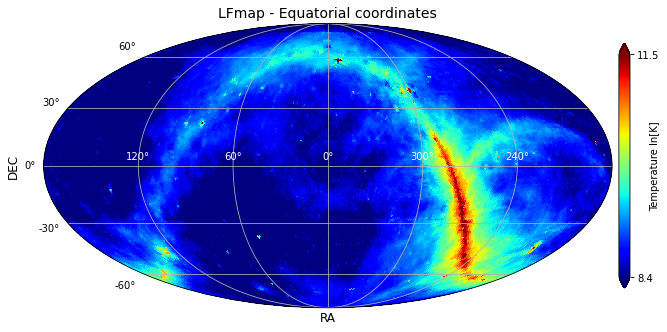

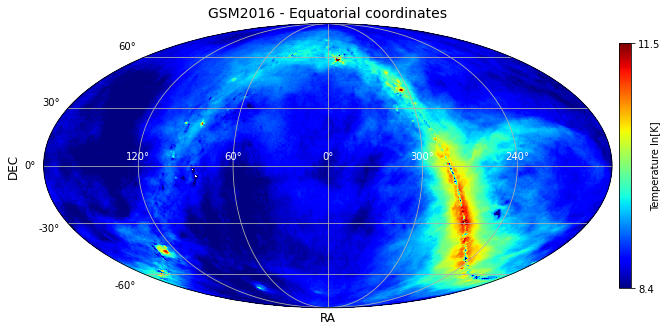

In [18]:
# Equatorial coordinates
newvisufunc.projview(map_1, coord=c_coord_1,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='RA',ylabel='DEC',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_1_title+' - Equatorial coordinates',lcolor='white')

newvisufunc.projview(map_2, coord=c_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='RA',ylabel='DEC',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_2_title+' - Equatorial coordinates',lcolor='white')

mollweide
mollweide
(49152,)
(12582912,)
mollweide
mollweide
mollweide


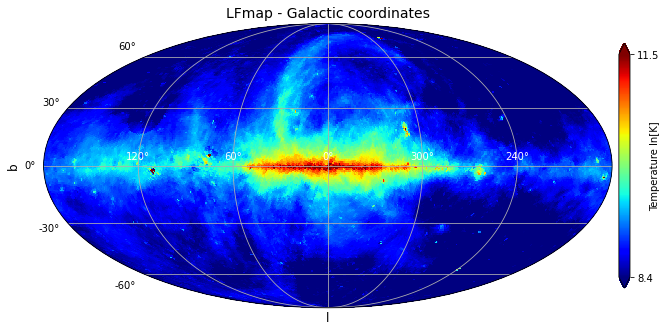

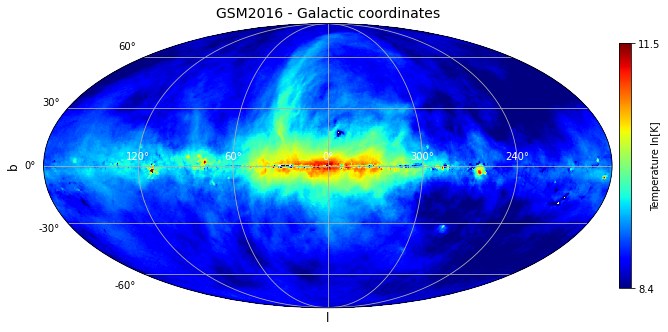

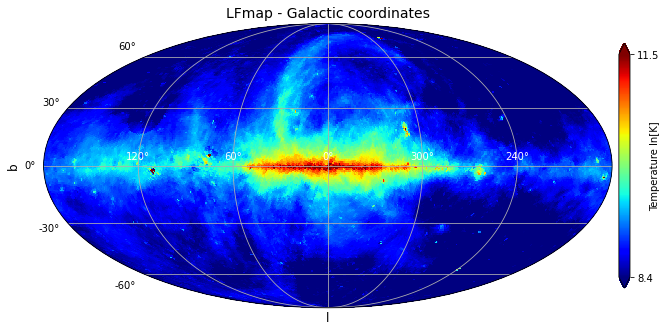

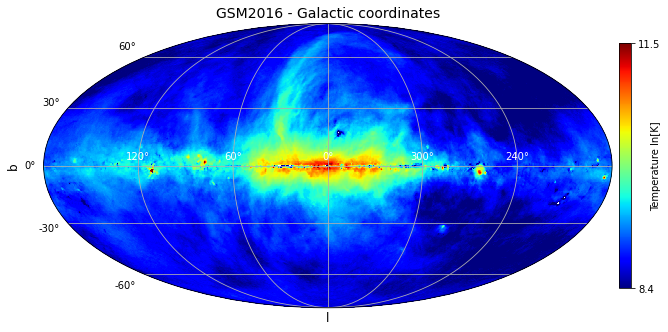

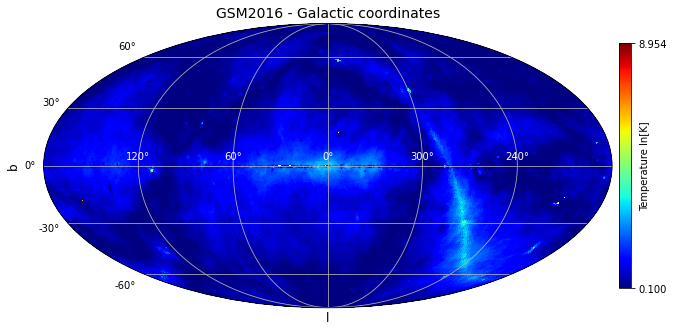

In [19]:
# mollweide projections
newvisufunc.projview(map_1, coord=g_coord_1,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='l',ylabel='b',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_1_title+" - Galactic coordinates",lcolor='white')

newvisufunc.projview(map_2, coord=g_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='l',ylabel='b',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_2_title+" - Galactic coordinates",lcolor='white')

# map difference
longitude_1, latitude_1, grid_map_1 = newvisufunc.projview(map_1, coord=g_coord_1, return_only_data=True)
longitude_2, latitude_2, grid_map_2 = newvisufunc.projview(map_2, coord=g_coord_2, return_only_data=True)

print(map_1.shape)
print(map_2.shape)

sky_vec = pix2vec(npix2nside(N_max),np.arange(N_max))
pixels_1 = vec2pix(npix2nside(len(map_1)), sky_vec)
pixels_2 = vec2pix(npix2nside(len(map_2)), sky_vec)
map_1_scaled = np.zeros(N_max)
map_2_scaled = np.zeros(N_max)

for (pix1, pix2) in enumerate(pixels_1):
    map_1_scaled[pix1] = map_1[pix2]
for (pix1, pix2) in enumerate(pixels_2):
    map_2_scaled[pix1] = map_2[pix2]

map_diff = abs(map_1_scaled - map_2_scaled)
max_diff = max(map_diff)

newvisufunc.projview(map_1_scaled, coord=g_coord_1,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='l',ylabel='b',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_1_title+" - Galactic coordinates",lcolor='white')

newvisufunc.projview(map_2_scaled, coord=g_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='l',ylabel='b',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_2_title+" - Galactic coordinates",lcolor='white')

newvisufunc.projview(map_diff, coord=g_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='l',ylabel='b',
                    cb_orientation='vertical',min=0.1,max=max_diff,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_2_title+" - Galactic coordinates",lcolor='white')

## Local coordinate system
The coordinate transformation is done from Equatorial coordinate system to local. So, make sure that both maps
are in Equatorial coordinate system when the rotation is perform. In the case of LFSS maps this means 
coord=['G','C'], and for Polisensky's maps just coord=['C']. The transformation to the local coordinate
system is done by Euler' rotation (ZYX). The rotation along the Z axis is given by the LST hourangle 
(LST hour times 15$^\circ$). The rotation along the Y is given by 90$^\circ$ + altitude of the local 
place.

In [47]:
LSTtime = 18
altitude = -35.206667

mollweide
mollweide


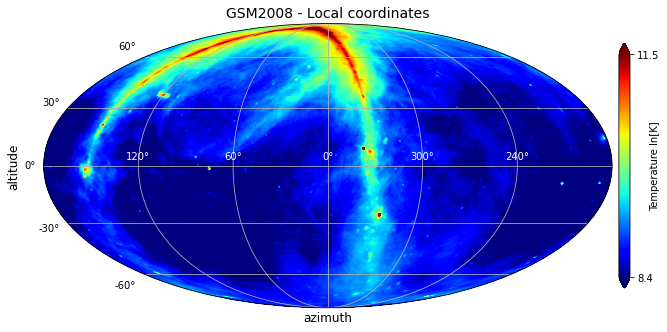

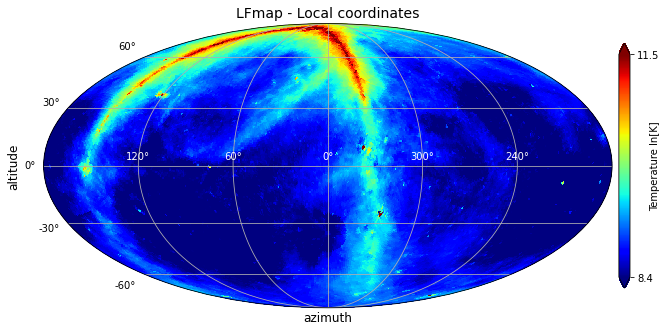

In [49]:
# Local coordinates at LST time "LSTtime" at altitude "altitude"
rotAngles=[(180+(LSTtime*15))%360,-(altitude-90)]
newvisufunc.projview(map_1,rot=rotAngles, coord=c_coord_1,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='azimuth',ylabel='altitude',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_1_title+' - Local coordinates',lcolor='white')

newvisufunc.projview(map_2, rot=rotAngles, coord=c_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='azimuth',ylabel='altitude',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="mollweide",title=map_2_title+' - Local coordinates',lcolor='white')

## Cartesian coordinate system (Galactic, Equatorial and local system)

cart
cart


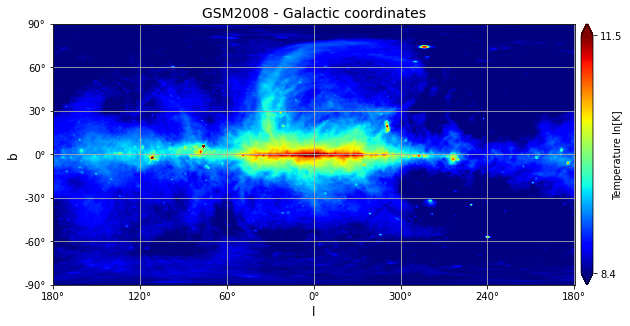

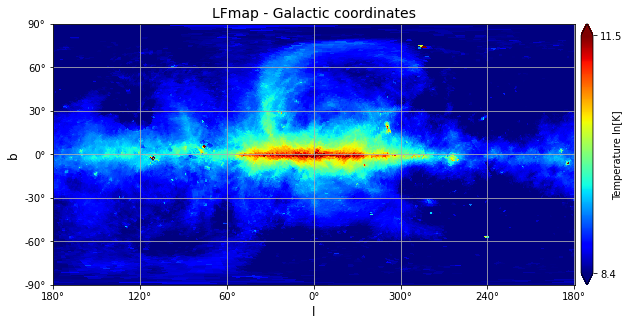

In [51]:
# Cartesian projections
newvisufunc.projview(map_1, coord=g_coord_1,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='l',ylabel='b',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="cart",title=map_1_title+" - Galactic coordinates",lcolor='white')

newvisufunc.projview(map_2, coord=g_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='l',ylabel='b',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="cart",title=map_2_title+" - Galactic coordinates",lcolor='white')

cart
cart


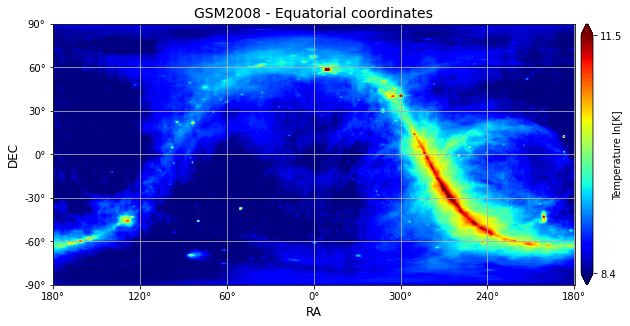

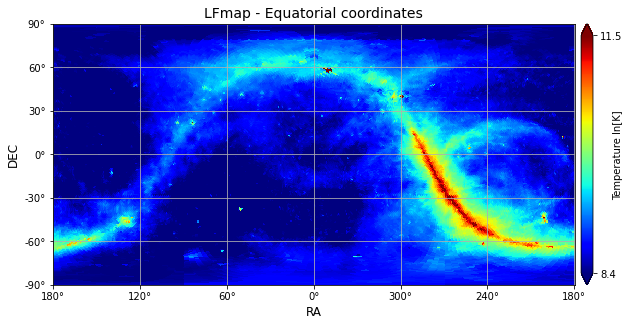

In [52]:
# Equatorial coordinates
newvisufunc.projview(map_1, coord=c_coord_1,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='RA',ylabel='DEC',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="cart",title=map_1_title+' - Equatorial coordinates',lcolor='white')

newvisufunc.projview(map_2, coord=c_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='RA',ylabel='DEC',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="cart",title=map_2_title+' - Equatorial coordinates',lcolor='white')

In [53]:
LSTtime = 18
# FYI PAO is at -35.2 altitude
altitude = -35.206667

cart
cart


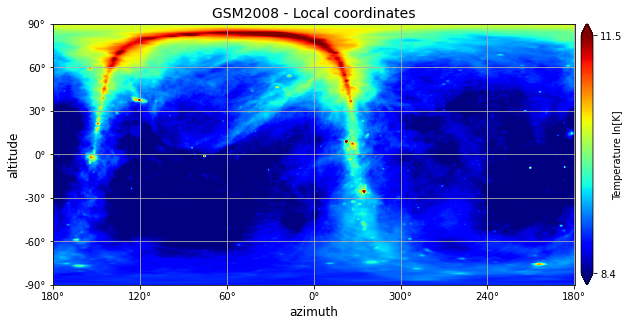

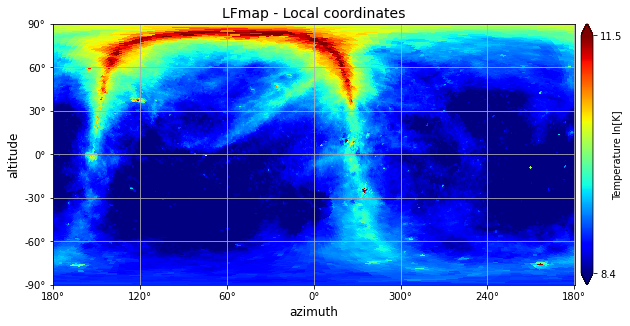

In [54]:
# Local coordinates at LST time "LSTtime" at altitude "altitude"
rotAngles=[(180+(LSTtime*15))%360,-(altitude-90)]
newvisufunc.projview(map_1,rot=rotAngles, coord=c_coord_1,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='azimuth',ylabel='altitude',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="cart",title=map_1_title+' - Local coordinates',lcolor='white')

newvisufunc.projview(map_2, rot=rotAngles, coord=c_coord_2,graticule=True, graticule_labels=True,
                    unit='Temperature ln[K]',xlabel='azimuth',ylabel='altitude',
                    cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                    projection_type="cart",title=map_2_title+' - Local coordinates',lcolor='white')

## Generate sky maps at local coordinates for one whole LST day
This is cool. Generate maps for example every 30 minutes and make a gif from it.
With smaller step size expect extensive RAM consumption.

In [55]:
altitude = -35.206667
saveFolder='/home/max/auger/soft/galactic_calibration/sky_maps/results/PAOsky/'
for LSTtime in np.arange(0,24,0.50):
    hour=str(int(LSTtime))
    minute=str(int((LSTtime-int(hour))*60))
    if int(minute) < 10:
        minute=minute.rjust(2, '0')
    if int(hour) < 10:
        hour=hour.rjust(2, '0')
    LSTstring=hour+":"+minute
    rotAngles=[(180+(LSTtime*15))%360,-(altitude-90)]
    newvisufunc.projview(map_1, rot=rotAngles, coord=c_coord_1,graticule=True, graticule_labels=True,
                        unit='Temperature ln[K]',xlabel='azimuth',ylabel='altitude',
                        cb_orientation='vertical',min=8.4,max=11.5,latitude_grid_spacing=30,
                        projection_type="cart",title=map_1_title+' - Local coordinates at '+LSTstring+\
                        ' LST', lcolor='white', override_plot_properties=[1,0.01,-9,16,0.42])
    # We need to pad the file name to have this in the right order when converting to gif.
    hourString = str("{:.2f}".format(LSTtime))
#     if LSTtime < 10:
#         hourString=hourString.rjust(5, '0')
    print("Generating map at "+hourString+" LST.")
    plt.subplots_adjust(bottom=0.15,top=0.92)
    plt.savefig(saveFolder+'local_at_'+hour+minute+'.png', facecolor='w', transparent=False)
    plt.close()

Overriding default plot properies: shrink= 1, pad=0.01, lpad=-9,width=9.6,r=0.42, to one:  shrink= 1, pad=0.01, lpad=-9,width=16,r=0.42
cart
Generating map at 0.00 LST.
Overriding default plot properies: shrink= 1, pad=0.01, lpad=-9,width=9.6,r=0.42, to one:  shrink= 1, pad=0.01, lpad=-9,width=16,r=0.42
cart
Generating map at 0.50 LST.
Overriding default plot properies: shrink= 1, pad=0.01, lpad=-9,width=9.6,r=0.42, to one:  shrink= 1, pad=0.01, lpad=-9,width=16,r=0.42
cart
Generating map at 1.00 LST.
Overriding default plot properies: shrink= 1, pad=0.01, lpad=-9,width=9.6,r=0.42, to one:  shrink= 1, pad=0.01, lpad=-9,width=16,r=0.42
cart
Generating map at 1.50 LST.
Overriding default plot properies: shrink= 1, pad=0.01, lpad=-9,width=9.6,r=0.42, to one:  shrink= 1, pad=0.01, lpad=-9,width=16,r=0.42
cart
Generating map at 2.00 LST.
Overriding default plot properies: shrink= 1, pad=0.01, lpad=-9,width=9.6,r=0.42, to one:  shrink= 1, pad=0.01, lpad=-9,width=16,r=0.42
cart
Generating map

In [60]:
# This runs a shell command to make a gif from the images
fullCommand="cd "+saveFolder+"; "+"convert -delay 20 -loop 0 *.png skyAnimation.gif"
result = subprocess.run(fullCommand, shell=True,capture_output=True)

In [61]:
# This runs a shell command to make an avi from the images, this is better and faster than GIF.
ffmpeg -r 10 -pattern_type glob -i 'local_at_*.png' -c:v libx264 skyAnimation.mp4

SyntaxError: invalid syntax (<ipython-input-61-36eafb98bba9>, line 2)

## Cross-checks
The idea is to find point sources on the maps, calculate their coordinates in Galactic, Equatorial and Local
coordinate systems and check if the positions are the same on the plotted maps. (Yes, they are).
The values of the point sources are from Wiki, so they do not 100% correspond to the positions on the plots.
Check the original LFSS LF map reference paper 
https://www.mdpi.com/galaxies/galaxies-06-00056/article_deploy/html/images/galaxies-06-00056-g004.png

In [27]:
# cross checks with different tools
convertEquatorial2GalacticAndLocal((19+58/60+21.67/3600)*15,35+12/60+5.78/3600,LSTtime,altitude,label='Cygnus')
convertEquatorial2GalacticAndLocal((23+23/60+24/3600)*15,58+48.9/60,LSTtime,altitude,label='Casiopea')
convertEquatorial2GalacticAndLocal((9)*15,-50,LSTtime,altitude,label='Vela')
convertEquatorial2GalacticAndLocal((13+25/60+5/3600)*15,-43+1/60,LSTtime,altitude,label='Centaurus A')
convertEquatorial2GalacticAndLocal((5++23/60+34/3600)*15,-69+45/60+22/3600,LSTtime,altitude,label='LMC')

Cygnus
<SkyCoord (Galactic): (l, b) in deg
    (71.33497896, 3.06685219)>
RA: 299.59029166666664   DEC: 35.20160555555556
ALT, AZ  (-53.23140702653228, 76.44619307141122)
Casiopea
<SkyCoord (Galactic): (l, b) in deg
    (111.73474282, -2.12956826)>
RA: 350.85   DEC: 58.815
ALT, AZ  (-66.07839569804595, 352.5213472007478)
Vela
<SkyCoord (Galactic): (l, b) in deg
    (269.91895516, -2.57701711)>
RA: 135   DEC: -50
ALT, AZ  (63.700286197263985, 226.50085792731136)
Centaurus A
<SkyCoord (Galactic): (l, b) in deg
    (309.44878839, 19.46227216)>
RA: 201.27083333333331   DEC: -42.983333333333334
ALT, AZ  (61.04256770972565, 116.63306128574476)
LMC
<SkyCoord (Galactic): (l, b) in deg
    (278.68989874, -33.15510663)>
RA: 80.89166666666667   DEC: -68.24388888888889
ALT, AZ  (34.50991222569689, 206.57920006192703)


## Some other projection types
Just a demonstration of what can healpy plot.
projection_type :  {'aitoff', 'hammer', 'lambert', 'mollweide', 'cart', '3d', 'polar'}

3d


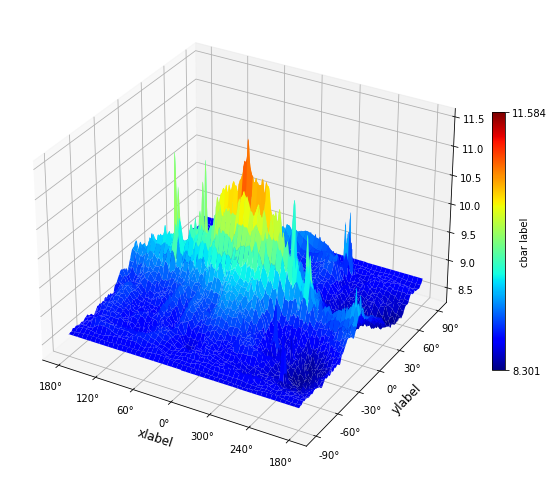

In [67]:
# 3d projection, vertical cbar
newvisufunc.projview(map_1, coord=g_coord_1,hold=False,graticule=True, graticule_labels=True,
                    projection_type="3d",unit='cbar label',xlabel='xlabel',ylabel='ylabel',
                    cb_orientation='vertical')

polar


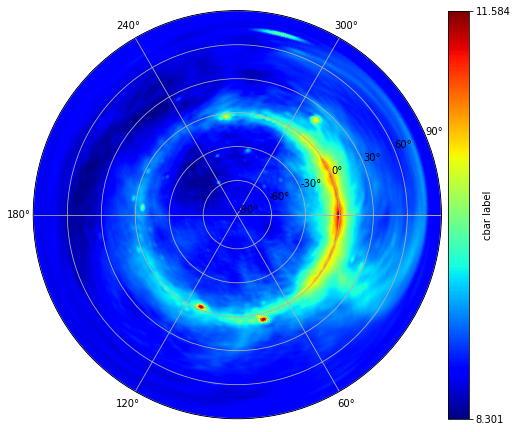

In [68]:
# polar projection, vertical cbar
newvisufunc.projview(map_1, coord=g_coord_1,graticule=True, graticule_labels=True, unit='cbar label',
                     cb_orientation='vertical', projection_type="polar",lcolor='white')

hammer


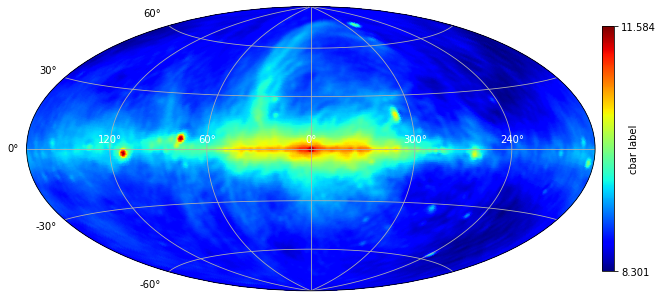

In [69]:
# hammer projection, vertical cbar
newvisufunc.projview(map_1, coord=g_coord_1,graticule=True, graticule_labels=True, unit='cbar label',
                     cb_orientation='vertical', projection_type="hammer",lcolor='white')

## Data dump
This is very usefull.

In [79]:
# return only data
# [longitude,  latitude, grid_map]
# longitude,  latitude are 1D arrays to convert them to 2D arrays for the plot use np.meshgrid(longitude,  latitude)
# longtitude goes from -pi to pi (-180 to 180 in degs)
# latitude goes from -pi/2 to pi/2 (-90 to 90 in degs)

longitude,  latitude, grid_map = newvisufunc.projview(map_1, coord=g_coord_1,return_only_data=True)
print(longitude.shape)
print(latitude.shape)
print(grid_map.shape)

(1000,)
(500,)
(500, 1000)
